# Dissolve to the rescue

During last week's assignment, the following symptoms occurred:

先週の課題でこんな症状が起こりました：

<img src="images/dissolve%20problem.png" width=600>

The reason this happens is because the data contains multiple rows with the same "S_NAME" value. To explain how one can fix this problem, let's take Kuya's Morioka map project as an example.

この問題が発生する理由は、データに同じ「S_NAME」値を持つ複数の行が含まれているためです。 この問題を解決する方法を説明するために、Kuya の盛岡地図プロジェクトを例に挙げてみましょう。

In [1]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import contextily as cx
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')



In order to run this notebook, you will have to download the `B002005212020DDSWC03201.zip` file from the class website.

In [2]:
# read the data for Morioka
gdf = gpd.read_file('B002005212020DDSWC03201.zip')

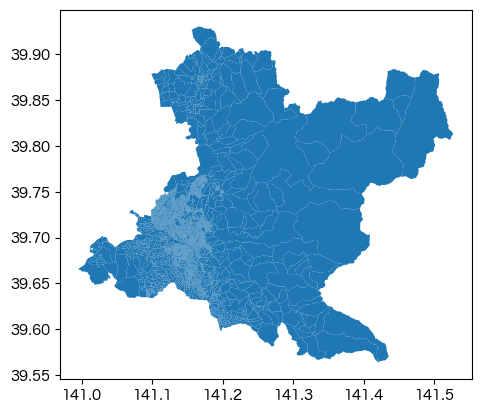

In [3]:
# quick plot
ax = gdf.plot()

# Create a bar graph of top 10 cities

In [4]:
# sort the data by JINKO
gdf = gdf.sort_values(by='JINKO', ascending=False )

In [5]:
fig = px.bar(gdf.head(10),
            y='JINKO',
            x='S_NAME',
            template='seaborn' # change this to see other styles
            )

fig.show()

What's going on? Why are there stacked bars? Let's investigate by filtering the data for Midorigaoka.

どう言うこと？ なぜ積み重ねられたバーがあるのですか? 緑が丘のデータをフィルタリングして調べてみましょう。

<AxesSubplot: >

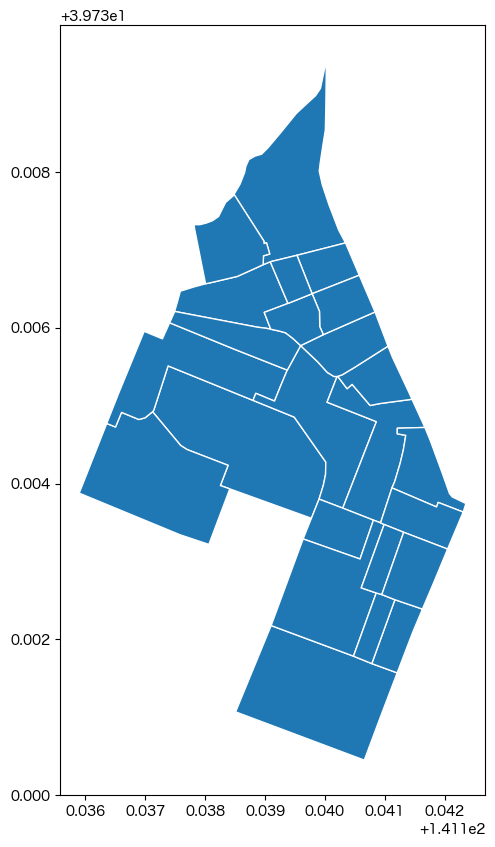

In [6]:
gdf[gdf['S_NAME']=='緑が丘二丁目'].plot(figsize=(10,10),edgecolor='white',linewidth=1)

I see! There are many polygons that have the value "緑が丘２丁目." In order to fix this problem, we will use a procedure called "dissolve," which takes geographic rows of the same value, and fuses them together. We can also specify to the have fused rows add the values of numeric columns. In this way, JINKO will be aggegrated for all cities that have the same S_NAME.

そうか！ 「緑が丘２丁目」という値を持つポリゴンが多数存在するんだ。 この問題を解決するために、同じ値の地理的な行を取得し、それらを結合する「ディゾルブ」と呼ばれる関数を使用します。 結合された行に数値列の値を追加するように指定することもできます。 このようにして、同じ S_NAME を持つすべての都市の JINKO が集約されます。

In [7]:
# dissolve by S_NAME and sum fields
gdf2 = gdf.dissolve(by='S_NAME',aggfunc='sum').reset_index()

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/geopandas/geodataframe.py:1676: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Now let's see what happens when we map Midorigaoka again.

では、もう一度緑が丘２丁目のマップをアウトプット

<AxesSubplot: >

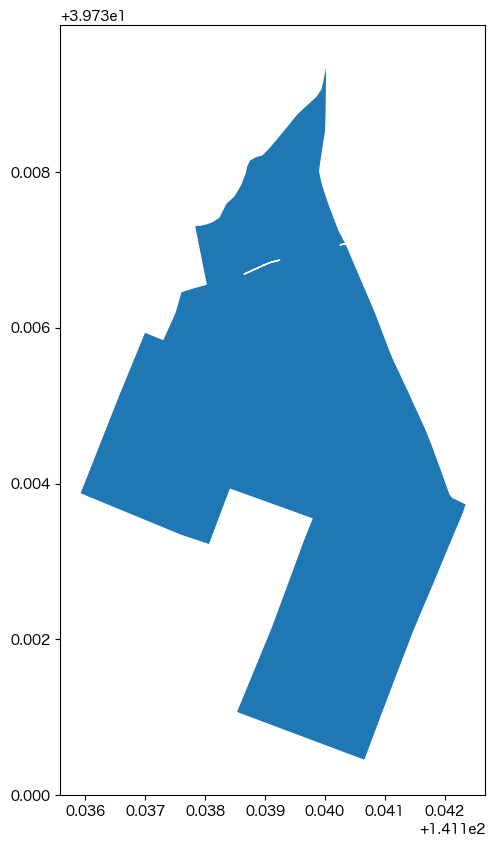

In [8]:
gdf2[gdf2['S_NAME']=='緑が丘二丁目'].plot(figsize=(10,10),edgecolor='white',linewidth=1)

Wow! Midorigaoka has been dissolved! What about the chart?

お！ディゾルブされてるのではないか！

チャートも作り直すと…

In [9]:
gdf2 = gdf2.sort_values(by='JINKO', ascending=False )

In [10]:
fig = px.bar(gdf2.head(10),
            y='JINKO',
            x='S_NAME',
            template='seaborn' # change this to see other styles
            )

fig.show()

And here is the top 10 city map.

そして、こちらがトップ10の都市マップです。

In [11]:
# change projection for your data to match basemap
gdf = gdf.to_crs(3857)
gdf2 = gdf2.to_crs(3857)

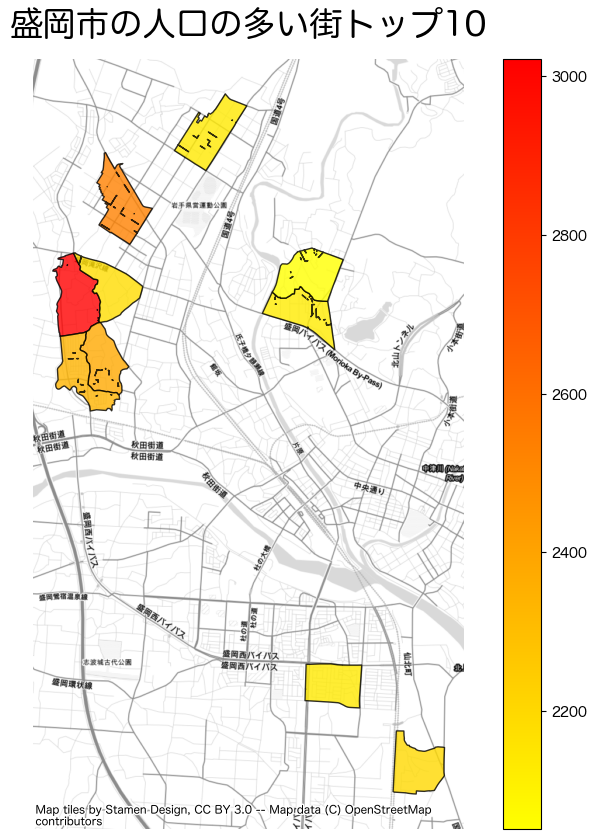

In [12]:
# population map
ax = gdf2.head(10).plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('盛岡市の人口の多い街トップ10',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

Let's look at the differences side-by-side. Notice that you can create side-by-side maps using "subplots," something we will learn how to use next week.

違いを並べて見てみましょう。 「サブプロット」を使用して並列マップを作成できることに注意してください。これについては、来週その使用方法を学習します。

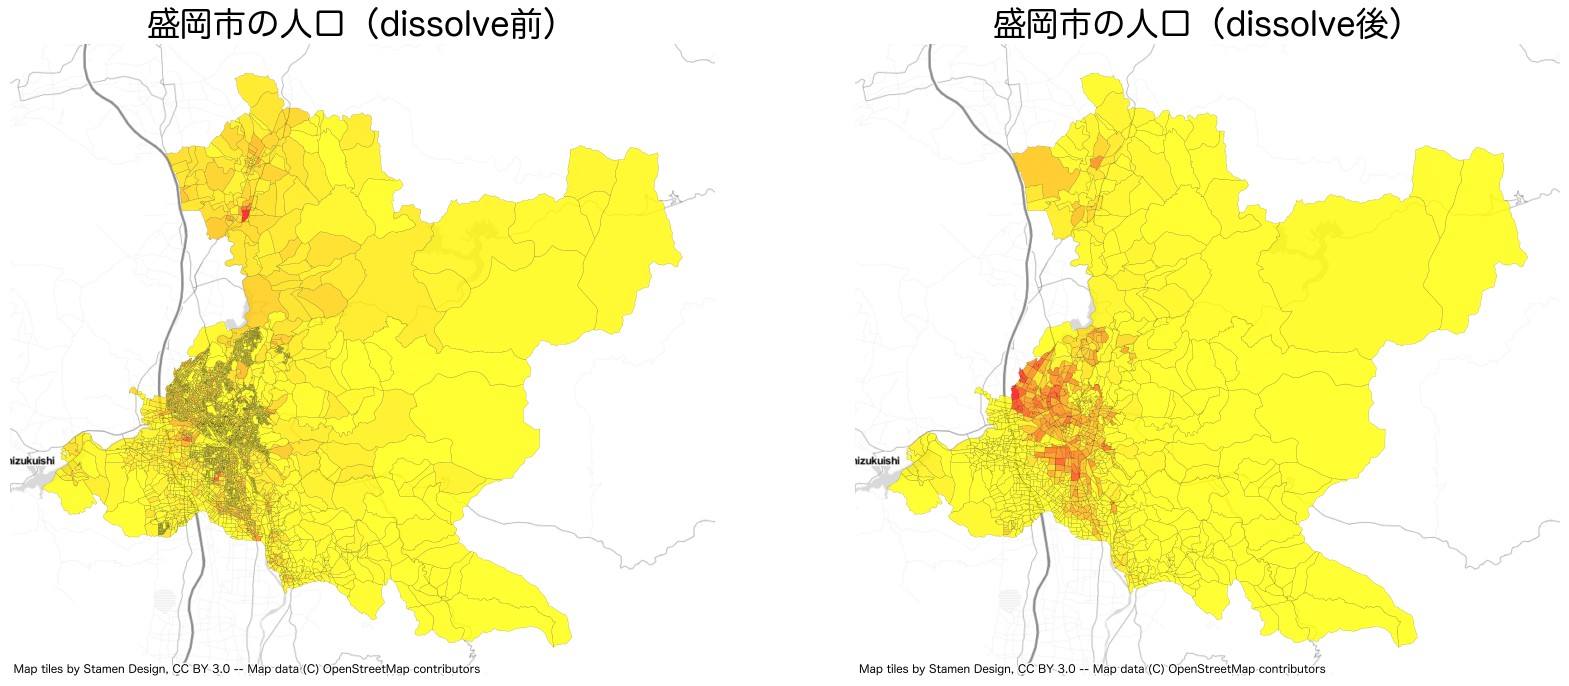

In [15]:
# population map
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,20))

gdf.plot(ax = ax1,
    column='JINKO',
    legend=False,
    cmap='autumn_r',
    edgecolor='black',
    linewidth=0.1,
    alpha=0.8)

gdf2.plot(ax = ax2,
    column='JINKO',
    legend=False,
    cmap='autumn_r',
    edgecolor='black',
    linewidth=0.1,
    alpha=0.8)

# hide axes
ax1.axis('off')
ax2.axis('off')

# title
ax1.set_title('盛岡市の人口（dissolve前）',fontsize=24);
ax2.set_title('盛岡市の人口（dissolve後）',fontsize=24);

# add basemap
cx.add_basemap(ax1,source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax2,source=cx.providers.Stamen.TonerLite)